In [21]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from mpl_toolkits import mplot3d

In [7]:
# open data
df = pd.read_csv('/Users/SnehPandya/Desktop/DeepLearningAGN/data/fixed_clean_full_data.csv',index_col = 0)
df = df.rename(columns = {'z':'z_ground_truth'})
df = df.drop(columns = ['ID','RA','DEC','z_ground_truth','ERR'])
df.head()

,M_i,mu,Mass_ground_truth
0,-23.901,20.7869,7.523331
1,-23.399,20.7824,8.817950
2,-24.735,20.5453,8.921718
3,-23.121,19.8859,9.022211
4,-26.451,20.6848,9.249395


In [8]:
# isolate attributes (redshift, tau) and targets (Mass)
X = df[['mu','M_i']].values # attributes
y = df[['Mass_ground_truth']].values # targets
print(X)
print(y)

[[ 20.7869 -23.901 ]
 [ 20.7824 -23.399 ]
 [ 20.5453 -24.735 ]
 ..., 
 [ 21.0673 -23.1   ]
 [ 22.8836 -25.76  ]
 [ 20.3018 -24.63  ]]
[[ 7.52333061]
 [ 8.81795034]
 [ 8.92171817]
 ..., 
 [ 8.02155865]
 [ 9.18012766]
 [ 8.98848251]]


In [9]:
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [10]:
# applying regression 
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:503: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
# retrieve line of best fit attributes
print(regressor.intercept_) # y intercept (b)
print(regressor.coef_) # slope (m)
print(regressor.score(X_test,y_test)) #(r^2 score)
print(regressor.coef_[0,1])

[ 3.53739459]
[[-0.02032438 -0.22901597]]
0.361662256414
-0.229015974737


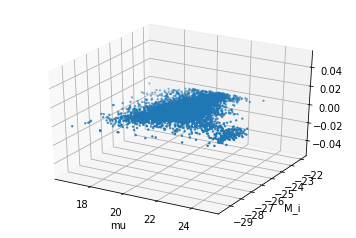

In [57]:
def func(x0,x1):
    return regressor.intercept_ + regressor.coef_[0,0]*x0 + regressor.coef_[0,1]*x1
x = X_train[:,0]
y = X_train[:,1]
# X, Y = np.meshgrid(x, y)
Z = func(x,y)
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('mu')
ax.set_ylabel('M_i')
plt.scatter(x,y,s=2)
plt
plt.show()

In [12]:
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)
print(y_pred_test)
print(y_pred_train)
print(X_test)

[[ 8.99951106]
 [ 8.63705778]
 [ 8.90900313]
 ..., 
 [ 9.30815688]
 [ 8.30749033]
 [ 9.07649427]]
[[ 9.1944469 ]
 [ 9.27248262]
 [ 8.574589  ]
 ..., 
 [ 8.35826753]
 [ 8.61082664]
 [ 8.59655538]]
[[ 20.7966 -25.696 ]
 [ 18.5053 -23.91  ]
 [ 21.3961 -25.354 ]
 ..., 
 [ 20.8112 -27.045 ]
 [ 20.9962 -22.692 ]
 [ 19.9611 -25.958 ]]


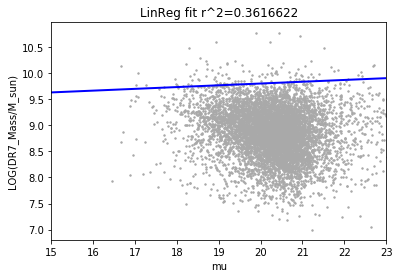

In [16]:
plt.scatter(X_train[:,0], y_train,  color='darkgray',s=2)
plt.xlim(15,23)
plt.plot([X_train.min(), X_train.max()], [y_pred_train.min(), y_pred_train.max()], color='blue', lw=2)
plt.xlabel('mu')
plt.ylabel('LOG(DR7_Mass/M_sun)')
plt.title('LinReg fit r^2=' + str(regressor.score(X_test,y_test))[0:9])
plt.show()

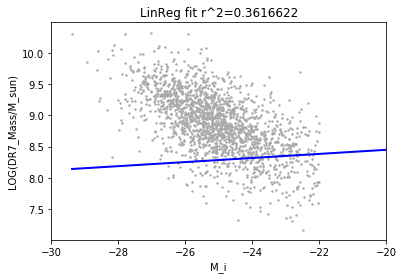

In [18]:
plt.scatter(X_test[:,1], y_test, color='darkgray',s=2)
plt.xlim(-30,-20)
plt.plot([X_test.min(), X_test.max()], [y_pred_test.min(), y_pred_test.max()], color='blue', lw=2)
plt.xlabel('M_i')
plt.ylabel('LOG(DR7_Mass/M_sun)')
plt.title('LinReg fit r^2=' + str(regressor.score(X_test,y_test))[0:9])
plt.show()

In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))